Losistic Regreesion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 오류 안뜨게 무시하기
import warnings
warnings.filterwarnings('ignore')
# 한글폰트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 SET

## 타이타닉 데이터 가지고 오기

In [2]:
df = pd.read_csv('./titanic.csv')

In [3]:
# 컬럼정보
# Passengerld : 탑승자 데이터 일련번호
# Survived : 생존여부, 0 = 사망, 1= 생존
# Pclass : 티켓의 선실 등금, 1 = 일등석, 2 = 이등석, 3 = 삼등석
# Name : 탑승자 이름
# Sex : 탑승자 성별
# Age : 탑승자 나이
# SibSp : 같이 탑승한 형제자매 또는 배우자 인원 수
# Parch : 같이 탑승한 부모님 또는 어린이 인원수
# Ticket : 티켓번호 
# Fare : 요금
# Cabin : 선실번호
# Embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

## 데이터 확인

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# 필요없는 컬럼을 제거합니다.
df0 = df.drop(['Age', 'Cabin'], axis = 1)
df0

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [6]:
#df에서 Embarked가 결측인 두 행을 제거합니다.
df0 = df0.dropna()
#제거 여부 확인해봅니다.
df0.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
# Name변수와 Ticket 변수를 제거합니다.
df1 = df0.drop(['Name', 'Ticket'], axis = 1)

In [8]:
# Sex데이터를 숫자형으로 변환합니다.
df1['Sex'] = df1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [9]:
# Embarked 데이터를 숫자형으로 변환합니다.
df1['Embarked'] = df1['Embarked'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)

## 전처리 후 데이터 확인

In [10]:
df1

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,2
1,2,1,1,1,1,0,71.2833,0
2,3,1,3,1,0,0,7.9250,2
3,4,1,1,1,1,0,53.1000,2
4,5,0,3,0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,2
887,888,1,1,1,0,0,30.0000,2
888,889,0,3,1,1,2,23.4500,2
889,890,1,1,0,0,0,30.0000,0


## 저장하기

In [11]:
df1.to_csv('./preprocessing_titanic.csv')

In [12]:
# 전처리 완료 데이터 불러오기
df = pd.read_csv('./preprocessing_titanic.csv',index_col= 'Unnamed: 0')

In [13]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,2
1,2,1,1,1,1,0,71.2833,0
2,3,1,3,1,0,0,7.9250,2
3,4,1,1,1,1,0,53.1000,2
4,5,0,3,0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,2
887,888,1,1,1,0,0,30.0000,2
888,889,0,3,1,1,2,23.4500,2
889,890,1,1,0,0,0,30.0000,0


## 데이터 분할

In [14]:
#모델의 훈련을 위하여 설명변수와 반응변수를 분리합니다.
X = df.drop(["PassengerId","Survived"], axis=1)
Y = df["Survived"]

# train-test_split를 통해 train 0.7 test 0.3 비율로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((622, 6), (622,), (267, 6), (267,))

# Losistic regreesion

In [15]:
# 다중공선성 확인
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

print(vif(X_train))
print(vif(X_test))

   VIF Factor  features
0    4.177094    Pclass
1    4.044110  Embarked
2    1.605663     Parch
3    1.563490       Sex
4    1.530061     SibSp
5    1.415674      Fare
   VIF Factor  features
0    4.280435    Pclass
1    4.039385  Embarked
2    1.740643       Sex
3    1.580910     Parch
4    1.495048     SibSp
5    1.383394      Fare


In [16]:
# statsmodel 라이브러리의 Logit 모형 확인
import statsmodels.api as sm

logreg = sm.Logit(Y_train, X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.464738
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 May 2023   Pseudo R-squ.:                  0.3031
Time:                        17:30:38   Log-Likelihood:                -289.07
converged:                       True   LL-Null:                       -414.78
Covariance Type:            nonrobust   LLR p-value:                 2.705e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5416      0.087     -6.202      0.000      -0.713      -0.370
Sex            2.7070      0.229     11.808      0.000       2.258       3.156
SibSp         -0.3016      0.125     -2.407      0.016      -0.547      -0.056
Parch         -0.0656      0.132     -0.497      0.619      -0.324       0.193
Fare           0.0065      0.002      2.674      0.007       0.002       0.011
Embarked      -0.2047      0.118     -1.741      0.082      -0.435       0.026
==============================================================================
"""

In [17]:
# list 생성
x_vars = list(logreg.summary2().tables[1].index)
statistic = []
p_val = []
d_f = []

# 리스트에 append (왈드 통계치, p값, 자유도)
for i in x_vars:
    statistic.append(logreg.wald_test(i).statistic[0][0])
    p_val.append(np.round(logreg.wald_test(i).pvalue, 4))
    d_f.append(logreg.wald_test(i).df_denom)

# 왈드 통계치 데이터 프레임 형성
wald = pd.DataFrame({'wald_statistic' : statistic,
                     'P>|z|' : p_val,
                     'degree_of_freedom' : d_f}, index=x_vars)

wald

,wald_statistic,P>|z|,degree_of_freedom
Pclass,38.470520,0.0000,1.0
Sex,139.423940,0.0000,1.0
SibSp,5.793892,0.0161,1.0
Parch,0.247501,0.6188,1.0
Fare,7.151831,0.0075,1.0
Embarked,3.030900,0.0817,1.0


In [18]:
# odds ratio 구하기
odds = np.exp(logreg.params)

for i in range(len(odds)):
    print(f'변수 {X_train.columns[i]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {X_train.columns[i]}의 odds ratio : {odds[i] : .3f}')
    if odds[i] > 1:
        print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(odds[i]-1) * 100 : .3f}% 증가한다.\n')
    else :
        print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(1 - odds[i]) * 100 : .3f}% 김소한다.\n')

변수 Pclass의 logit : -0.542
변수 Pclass가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.542배 증가한다.
변수 Pclass의 odds ratio :  0.582
변수 Pclass가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 41.818% 김소한다.

변수 Sex의 logit :  2.707
변수 Sex가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 2.707배 증가한다.
변수 Sex의 odds ratio :  14.984
변수 Sex가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1398.404% 증가한다.

변수 SibSp의 logit : -0.302
변수 SibSp가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.302배 증가한다.
변수 SibSp의 odds ratio :  0.740
변수 SibSp가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 26.039% 김소한다.

변수 Parch의 logit : -0.066
변수 Parch가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.066배 증가한다.
변수 Parch의 odds ratio :  0.936
변수 Parch가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 6.353% 김소한다.

변수 Fare의 logit :  0.007
변수 Fare가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.007배 증가한다.
변수 Fare의 odds ratio :  1.007
변수 Fare가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.653% 증가한다.

변수 Embarked의 logit : -0.205
변수 Embarked가 1단위 증가할 때, 생존할 로

In [19]:
# P-value 값을 통해 컬럼이 유의한지 아닌지 확인하기
sig_level = .05 
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
logistic_variable

,logit,odds ratio,p-value,above 5.0%
Pclass,-0.541595,0.581820,0.0000,Yes
Sex,2.706985,14.984036,0.0000,Yes
SibSp,-0.301630,0.739612,0.0161,Yes
Parch,-0.065638,0.936469,0.6188,No
Fare,0.006508,1.006530,0.0075,Yes
Embarked,-0.204691,0.814899,0.0817,No


In [20]:
pd.concat([logistic_variable, wald[['wald_statistic', 'degree_of_freedom']]], axis = 1)

,logit,odds ratio,p-value,above 5.0%,wald_statistic,degree_of_freedom
Pclass,-0.541595,0.581820,0.0000,Yes,38.470520,1.0
Sex,2.706985,14.984036,0.0000,Yes,139.423940,1.0
SibSp,-0.301630,0.739612,0.0161,Yes,5.793892,1.0
Parch,-0.065638,0.936469,0.6188,No,0.247501,1.0
Fare,0.006508,1.006530,0.0075,Yes,7.151831,1.0
Embarked,-0.204691,0.814899,0.0817,No,3.030900,1.0


In [21]:
def logistic_variable(X_train,Y_train, sig_level=.05, output = True):
    import statsmodels.api as sm
    import numpy as np
    import pandas as pd
    
    logistic_result = sm.Logit(Y_train, X_train).fit()
    print(logistic_result.summary())
    
    # list 생성
    x_vars = list(logreg.summary2().tables[1].index)
    statistic = []
    p_val = []
    d_f = []

    # 리스트에 append (왈드 통계치, p값, 자유도)
    for i in x_vars:
        statistic.append(logreg.wald_test(i).statistic[0][0])
        p_val.append(np.round(logreg.wald_test(i).pvalue, 4))
        d_f.append(logreg.wald_test(i).df_denom)


    # 왈드 통계치 데이터 프레임 형성
    wald = pd.DataFrame({'wald_statistic' : statistic,
                        'P>|z|' : p_val,
                        'degree_of_freedom' : d_f}, index=x_vars)
    
    # odds 생성
    odds = np.exp(logistic_result.params)
    
    if output == True:
        for i in range(len(odds)):
            print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logistic_result.params[i] : .3f}배 증가한다.')
            if odds[i] > 1:
                print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(odds[i]-1) * 100 : .3f}% 증가한다.\n')
            else :
                print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(1 - odds[i]) * 100 : .3f}% 김소한다.\n')    
    else:
        pass
    
    logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
    logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
    logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
    logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
    
    result = pd.concat([logistic_variable, wald[['wald_statistic', 'degree_of_freedom']]], axis = 1)
    
    return result

In [22]:
logistic_variable(X_train,Y_train, .05, True)

Optimization terminated successfully.
         Current function value: 0.464738
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 May 2023   Pseudo R-squ.:                  0.3031
Time:                        17:30:38   Log-Likelihood:                -289.07
converged:                       True   LL-Null:                       -414.78
Covariance Type:            nonrobust   LLR p-value:                 2.705e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5416      0.087     -6.202      0.000      -0.713      -0.370
Sex            2.7070      0.

,logit,odds ratio,p-value,above 5.0%,wald_statistic,degree_of_freedom
Pclass,-0.541595,0.581820,0.0000,Yes,38.470520,1.0
Sex,2.706985,14.984036,0.0000,Yes,139.423940,1.0
SibSp,-0.301630,0.739612,0.0161,Yes,5.793892,1.0
Parch,-0.065638,0.936469,0.6188,No,0.247501,1.0
Fare,0.006508,1.006530,0.0075,Yes,7.151831,1.0
Embarked,-0.204691,0.814899,0.0817,No,3.030900,1.0


# 성능평가

In [23]:
# 혼동행렬 (confusion matrix)
cm_df = pd.DataFrame(logreg.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,332.0,50.0
Actual 1,80.0,160.0


In [24]:
y_pred = logreg.predict(X_train)
y_pred

486    0.884947
293    0.674897
173    0.121043
450    0.148695
361    0.230693
         ...   
107    0.120940
271    0.115662
862    0.872669
436    0.540413
103    0.121549
Length: 622, dtype: float64

In [25]:
def cut_off(y_pred, threshold):
    y = y_pred.copy()
    y[y>threshold] = 1
    y[y<=threshold] = 0
    return y.astype(int)

y_pred = cut_off(logreg.predict(X_train),0.5)

# 실제, 예측 값에 대한 데이터 프레임 형성
df = pd.DataFrame(list(zip(Y_train, y_pred)))
df.columns = ['actual', 'pred']
df

,actual,pred
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
617,1,0
618,1,0
619,1,1
620,0,1


In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀 모델 생성 및 학습
y_pred = cut_off(logreg.predict(X_train),0.5)

# 만든 함수 활용이 아닌 np 사용시 더 간편
# y_pred = np.where(pred > 0.5, 1 , 0)

# 성능 평가
print('Accuacy Score: ', accuracy_score(Y_train, y_pred))
print('ROC AUC Score: ', roc_auc_score(Y_train, y_pred))

Accuacy Score:  0.7909967845659164
ROC AUC Score:  0.7678883071553229


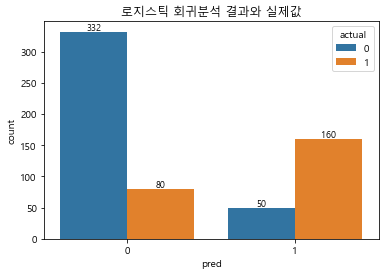

In [27]:
ax = sns.countplot(x=df['pred'], hue=df['actual'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_title('로지스틱 회귀분석 결과와 실제값')
plt.show() 

In [28]:
# 혼동행렬 형성
actual0 = []
actual1 = []

for i in [0,1]:
    for j,k in zip([0,1],[actual0,actual1]):
        k.append(len(df.loc[(df.actual == i) & (df.pred == j)]))

cm_df = pd.DataFrame(zip(actual0, actual1))
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
cm_df

precision = actual0[0]/sum(actual0)
recall = actual0[0]/(actual0[0]+actual1[0])
accuracy = (actual0[0]+actual1[1])/(sum(actual0)+sum(actual1))
f1_scroe = 2 * (precision * recall) / (precision + recall)

print(f'Precision (정밀도) :{precision * 100 : .2f}%')
print(f'Recall (재현율) :{recall * 100 : .2f}%')
print(f'Accuracy (정확도) :{accuracy * 100 : .2f}%')
print(f'F1 Score :{f1_scroe * 100 : .2f}%')

Precision (정밀도) : 80.58%
Recall (재현율) : 86.91%
Accuracy (정확도) : 79.10%
F1 Score : 83.63%


In [29]:
def cut_off(Y_train, Y_pred, threshold):
    # 빈 리스트 생성
    actual0 = []
    actual1 = []
    
    # 임계치 조정
    y = Y_pred.copy()
    y[y>threshold] = 1
    y[y<=threshold] = 0
    y.astype(int)

    # 실제, 예측 값에 대한 데이터 프레임 형성
    tmp = pd.DataFrame(list(zip(Y_train, y)))
    tmp.columns = ['actual', 'pred']
    
    for i in [0,1]:
        for j,k in zip([0,1],[actual0,actual1]):
            k.append(len(tmp.loc[(tmp.actual == i) & (tmp.pred == j)]))

    # 혼동행렬 형성
    confusion_matrix = pd.DataFrame(zip(actual0, actual1))
    print(actual0 + actual1)
    confusion_matrix.columns = ['Predicted 0', 'Predicted 1']
    confusion_matrix = confusion_matrix.rename(index={0: 'Actual 0',1: 'Actual 1'})
    
    # 평가지표 형성
    precision = actual0[0]/sum(actual0)
    recall = actual0[0]/(actual0[0]+actual1[0])
    accuracy = (actual0[0]+actual1[1])/(sum(actual0)+sum(actual1))
    f1_scroe = 2 * (precision * recall) / (precision + recall)

    print(f'임계치 {threshold} 수준에서의 분류 평가 지표')
    print(f'Precision (정밀도) :{precision * 100 : .2f}%')
    print(f'Recall (재현율) :{recall * 100 : .2f}%')
    print(f'Accuracy (정확도) :{accuracy * 100 : .2f}%')
    print(f'F1 Score :{f1_scroe * 100 : .2f}%')
    print(confusion_matrix,'\n')
    
    return confusion_matrix, actual0, actual1, precision,recall,accuracy,f1_scroe

cut_off(Y_train, logreg.predict(X_train), 0.5)

[332, 80, 50, 160]
임계치 0.5 수준에서의 분류 평가 지표
Precision (정밀도) : 80.58%
Recall (재현율) : 86.91%
Accuracy (정확도) : 79.10%
F1 Score : 83.63%
          Predicted 0  Predicted 1
Actual 0          332           50
Actual 1           80          160 



(          Predicted 0  Predicted 1
 Actual 0          332           50
 Actual 1           80          160,
 [332, 80],
 [50, 160],
 0.8058252427184466,
 0.8691099476439791,
 0.7909967845659164,
 0.836272040302267)

In [30]:
# 리스트 형성\']/
precision_list = []
recall_list = []
accuracy_list = []
f1_scroe_list = []
AP_00 = []
AP_01 = []
AP_10 = []
AP_11 = []

# 임계치를 0.1~0.9까지 설정
for i in np.linspace(0.1,0.9,9):
    maxtix, actual0, actual1, precision,recall,accuracy,f1_scroe = cut_off(Y_train, logreg.predict(X_train), i)
    AP_00.append(actual0[0])
    AP_01.append(actual0[1])
    AP_10.append(actual1[0])
    AP_11.append(actual1[1])
    precision_list.append(precision * 100)
    recall_list.append(recall* 100)
    accuracy_list.append(accuracy* 100)
    f1_scroe_list.append(f1_scroe* 100)

# 데이터 프레임화
score = pd.DataFrame({'AP_00' : AP_00,
                    'AP_01' : AP_01,
                    'AP_10' : AP_10,
                    'AP_11' : AP_11,
                    'precision' : precision_list,
                    'recall' : recall_list,
                    'accuracy' : accuracy_list,
                    'f1_score' : f1_scroe_list}).transpose()
score.columns= [f'threshold = {i}' for i in np.linspace(0.1,0.9,9)]
score

[45, 4, 337, 236]
임계치 0.1 수준에서의 분류 평가 지표
Precision (정밀도) : 91.84%
Recall (재현율) : 11.78%
Accuracy (정확도) : 45.18%
F1 Score : 20.88%
          Predicted 0  Predicted 1
Actual 0           45          337
Actual 1            4          236 

[262, 48, 120, 192]
임계치 0.2 수준에서의 분류 평가 지표
Precision (정밀도) : 84.52%
Recall (재현율) : 68.59%
Accuracy (정확도) : 72.99%
F1 Score : 75.72%
          Predicted 0  Predicted 1
Actual 0          262          120
Actual 1           48          192 

[285, 52, 97, 188]
임계치 0.30000000000000004 수준에서의 분류 평가 지표
Precision (정밀도) : 84.57%
Recall (재현율) : 74.61%
Accuracy (정확도) : 76.05%
F1 Score : 79.28%
          Predicted 0  Predicted 1
Actual 0          285           97
Actual 1           52          188 

[313, 71, 69, 169]
임계치 0.4 수준에서의 분류 평가 지표
Precision (정밀도) : 81.51%
Recall (재현율) : 81.94%
Accuracy (정확도) : 77.49%
F1 Score : 81.72%
          Predicted 0  Predicted 1
Actual 0          313           69
Actual 1           71          169 

[332, 80, 50, 160]
임계치 0.5 수준에서의

,threshold = 0.1,threshold = 0.2,threshold = 0.30000000000000004,threshold = 0.4,threshold = 0.5,threshold = 0.6,threshold = 0.7000000000000001,threshold = 0.8,threshold = 0.9
AP_00,45.000000,262.000000,285.000000,313.000000,332.000000,342.000000,368.000000,381.000000,381.000000
AP_01,4.000000,48.000000,52.000000,71.000000,80.000000,82.000000,111.000000,171.000000,198.000000
AP_10,337.000000,120.000000,97.000000,69.000000,50.000000,40.000000,14.000000,1.000000,1.000000
AP_11,236.000000,192.000000,188.000000,169.000000,160.000000,158.000000,129.000000,69.000000,42.000000
precision,91.836735,84.516129,84.569733,81.510417,80.582524,80.660377,76.826722,69.021739,65.803109
recall,11.780105,68.586387,74.607330,81.937173,86.910995,89.528796,96.335079,99.738220,99.738220
accuracy,45.176849,72.990354,76.045016,77.491961,79.099678,80.385852,79.903537,72.347267,68.006431
f1_score,20.881671,75.722543,79.276773,81.723238,83.627204,84.863524,85.481998,81.584582,79.292404


In [31]:
# 라이브러리 호출으로 분류분석 평가 도출
from sklearn.metrics import classification_report

print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       382
           1       0.76      0.67      0.71       240

    accuracy                           0.79       622
   macro avg       0.78      0.77      0.77       622
weighted avg       0.79      0.79      0.79       622



참고) hyperparameter GridSearchCV

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 분석 모형 설정
lg = LogisticRegression()
# 하이퍼 파라미터 dict 형태로 설정
params = {'penalty':['l2'],'C':[0.01, 0.1, 1, 5, 10]}

# 그리드서치 시행
grid_clf = GridSearchCV(estimator = lg, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=3, 
                        refit=True, 
                        n_jobs=-1)
grid_clf.fit(X_train,Y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

# 그리드 서치 결과 전부 데이터 프레임 화 시행
pd.DataFrame(grid_clf.cv_results_)

최적 하이퍼 파라미터 :{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 :0.836


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036945,0.012351,0.006805,0.000167,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.826221,0.840846,0.741093,0.802720,0.043984,5
1,0.048011,0.004653,0.006944,0.000770,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.854248,0.838189,0.795128,0.829188,0.024961,4
2,0.055330,0.004290,0.012464,0.006631,1,l2,"{'C': 1, 'penalty': 'l2'}",0.857275,0.839272,0.811959,0.836169,0.018630,1
3,0.050693,0.002821,0.007828,0.001124,5,l2,"{'C': 5, 'penalty': 'l2'}",0.856592,0.836516,0.813829,0.835645,0.017469,2
4,0.044404,0.006450,0.007867,0.001251,10,l2,"{'C': 10, 'penalty': 'l2'}",0.856396,0.836516,0.813533,0.835482,0.017514,3
